<a href="https://colab.research.google.com/github/neethu-vm/ML-project/blob/main/Copy_of_02_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Explore the data**


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

**Preprocess the data**


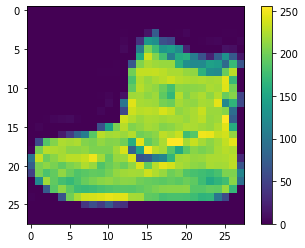

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#normalization
train_images = train_images / 255.0
test_images = test_images / 255.0

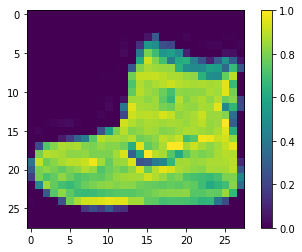

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

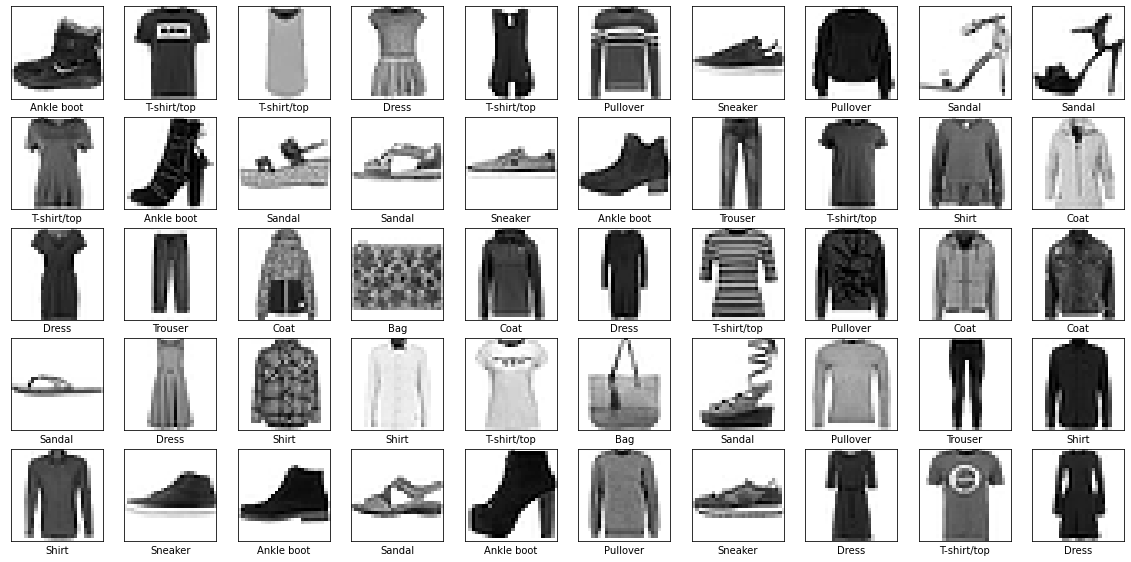

In [ ]:
plt.figure(figsize=(20,20))
for i in range(0,50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #we are creating a 784 long 1d array
    keras.layers.Dense(258, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 258)               202530    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               33152     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 236,972
Trainable params: 236,972
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=30,batch_size = 10000) #epochs is the number of iterations.

Epoch 1/30
6/6 [==============================] - 2s 215ms/step - loss: 1.7859 - accuracy: 0.4612
Epoch 2/30
6/6 [==============================] - 1s 208ms/step - loss: 0.9772 - accuracy: 0.6730
Epoch 3/30
6/6 [==============================] - 1s 212ms/step - loss: 0.7412 - accuracy: 0.7347
Epoch 4/30
6/6 [==============================] - 1s 209ms/step - loss: 0.6383 - accuracy: 0.7809
Epoch 5/30
6/6 [==============================] - 1s 202ms/step - loss: 0.5756 - accuracy: 0.8027
Epoch 6/30
6/6 [==============================] - 1s 203ms/step - loss: 0.5336 - accuracy: 0.8175
Epoch 7/30
6/6 [==============================] - 1s 204ms/step - loss: 0.5037 - accuracy: 0.8271
Epoch 8/30
6/6 [==============================] - 1s 208ms/step - loss: 0.4819 - accuracy: 0.8342
Epoch 9/30
6/6 [==============================] - 1s 207ms/step - loss: 0.4637 - accuracy: 0.8398
Epoch 10/30
6/6 [==============================] - 1s 205ms/step - loss: 0.4474 - accuracy: 0.8450
Epoch 11/30
6/6 [==

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3717 - accuracy: 0.8679

Test accuracy: 0.867900013923645


In [ ]:
?tf.keras.losses.SparseCategoricalCrossentropy

In [ ]:
model.predict(test_images)

array([[ -5.0004287 ,  -6.4762855 ,  -3.528995  , ...,   4.0224514 ,
          0.4930896 ,   6.7742605 ],
       [  2.4026964 ,  -4.5393376 ,  11.348823  , ..., -16.870987  ,
         -0.38302594, -13.938066  ],
       [  2.9142642 ,  12.754671  ,  -1.0463339 , ...,  -4.569918  ,
         -2.0388176 ,  -9.241135  ],
       ...,
       [  3.0421941 ,  -5.022574  ,   0.18644851, ...,  -4.0008225 ,
          7.2532625 ,  -8.32605   ],
       [ -1.9670161 ,  10.956037  ,  -2.4046953 , ...,  -3.6008923 ,
         -3.7762666 ,  -4.3483934 ],
       [ -3.1020555 ,  -4.5792017 ,  -1.2858219 , ...,   2.6575248 ,
          0.6224075 ,  -0.693789  ]], dtype=float32)

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([6.8435897e-06, 1.5643268e-06, 2.9807083e-05, 1.0858374e-05,
       9.5894839e-06, 5.2361153e-02, 4.6768339e-05, 5.6737576e-02,
       1.6637514e-03, 8.8913208e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

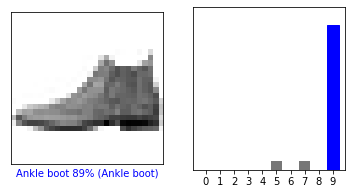

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

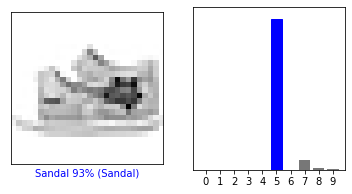

In [ ]:
i = 9999
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

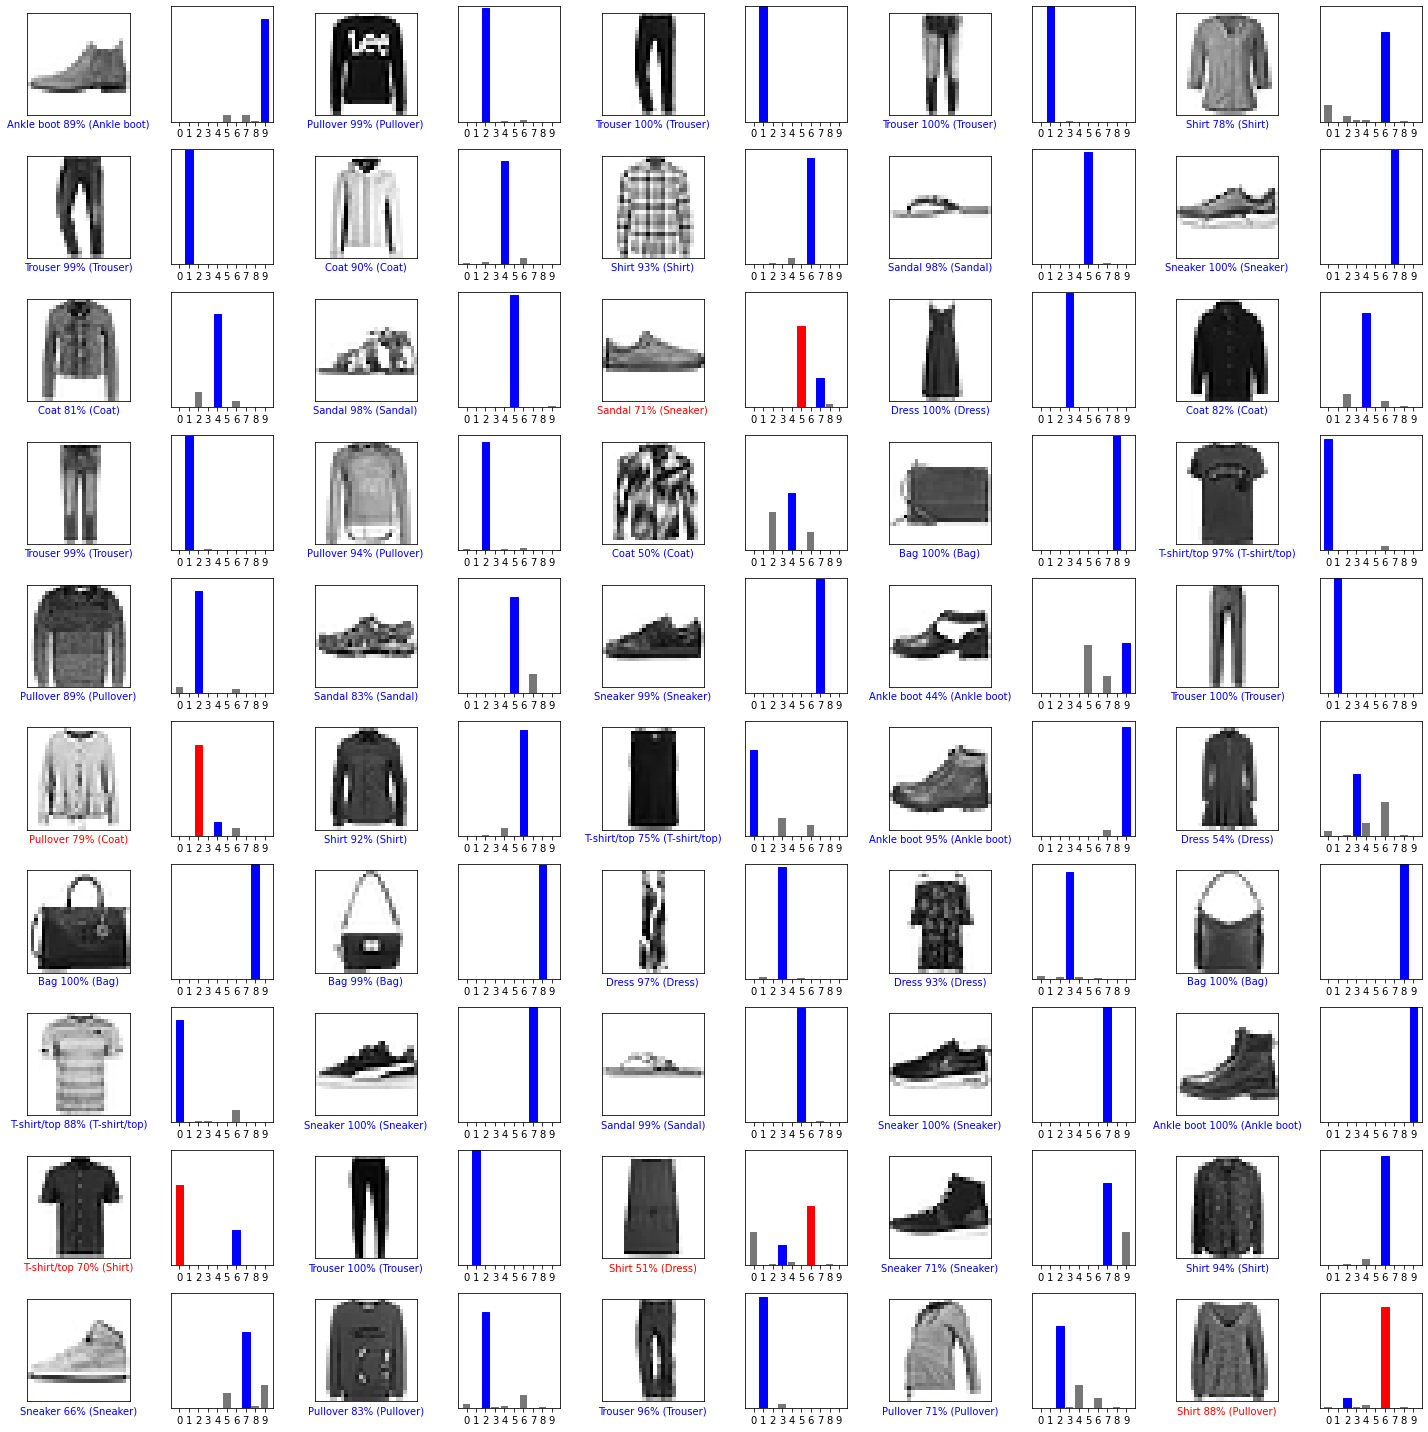

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


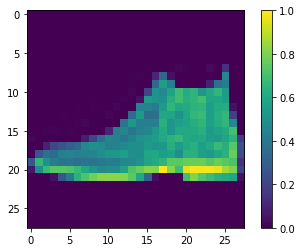

In [ ]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.1995530e-07 1.0956162e-08 2.8122381e-07 9.8322392e-11 2.7350197e-08
  3.7114875e-04 6.1733357e-07 2.4210110e-02 4.5220688e-07 9.7541726e-01]]


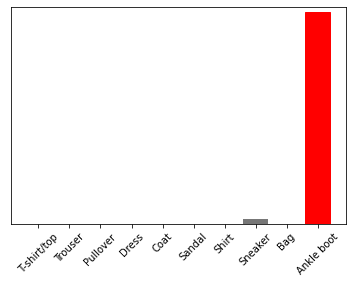

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9